In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import yfinance as yf
import pickle
import plotly.express as px
import plotly.graph_objects as go


# from myportfolio import myportfolio as mp
from demoportfolio import demo_portfolio as dp

style.use('ggplot')

# Setting up the portfolio or choosing the stocks

`myportfolio` is a hidden file. It's a dictionary with the following structure

`demo_portfolio = {'AAPL': [{'action':'buy', 'date': dt.date(year=2010, month=1, day=1), 'amount': 2000}],
                  'MSFT': [{'action':'buy', 'date': dt.date(year=2000, month=1, day=1), 'amount': 2000}]}`

It's a dictionary with
<ul><li> keys: name of the stock
<li>values: A list (or lists) of dictionary(ies) with:
    <ul><li> key `action` and values the string `buy` or `sell` for the corresponding action</li>
    <li> key `date` and value a datetime object with the date of buying</li>
        <li> key `amount` a float with the number of shares bought</li> </ul>
    Each value of the dictionary can have longer than 1 length of lists, if a share was bought or sold multiple times.</ul>

In [6]:
stocks = list(dp.keys())

# Use your own portfolio
# stocks = list(myportfolio.keys())

# or set your own stocks
# stocks = ['AAPL', 'MSFT']

# print example, also accessing the data in the dictionary
for stock in dp:
    for dic in dp[stock]:
        #         print(stock, dic)
        print(
            f"For {stock} on {str(dic['date'])}, bought {dic['amount']} share(s)")

For AAPL on 2010-01-01, bought 2000 share(s)
For MSFT on 2000-01-01, bought 2000 share(s)


# Setting dates and downloading the data

In [7]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()


df = yf.download(stocks,
                 start=start,
                 end=end,
                 progress=True)

# df.to_csv(f"Stocks_{'-'.join(stocks)}_{dt.date.today()}.csv")



[*********************100%***********************]  2 of 2 completed


# Exploratory plots

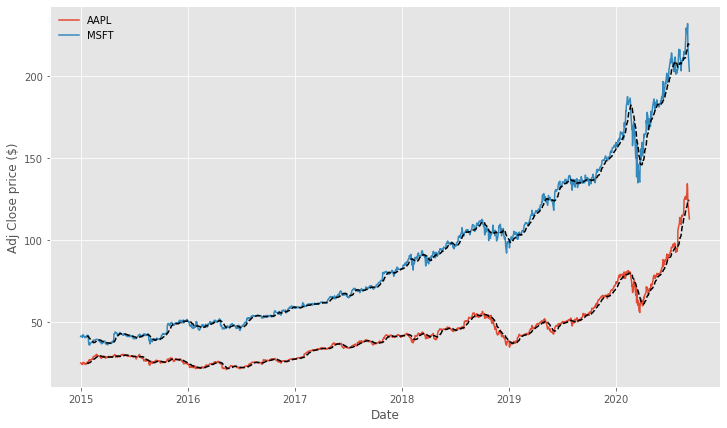

In [8]:
plot = True
plt.figure(figsize=(12,7))
if plot:
    if len(stocks) == 1:
        plt.plot(df.index, df['Adj Close'], label=stocks[0])
        plt.plot(df.index, df['Adj Close'].rolling(window=14).mean(), '--k')
        plt.legend(frameon=False)
        plt.xlabel('Date')
        plt.ylabel('Adj Close price ($)')
        plt.show()

    else:
        for stock in stocks:
            plt.plot(df.index, df['Adj Close'][stock], label=stock)
            plt.plot(df.index, df['Adj Close'][stock].rolling(window=14).mean(), '--k')

        plt.legend(frameon=False)
        plt.xlabel('Date')
        plt.ylabel('Adj Close price ($)')
        plt.savefig(fname='Figure_1.png', bbox_tight=True, transparency=True, dpi=400)
        plt.show()

In [9]:
# fig = go.Figure()
# for stock in stocks:
#     fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'][stock],
#                     mode='lines',
#                     name=stock))
#     fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'][stock].rolling(window=14).mean(),
#                     line=dict(color='black', dash='dash'),
#                     name=f'{stock} 14 days moving average'))
    
# fig.update_layout(title=f'Adj Close price',
#                    xaxis_title='Date',
#                    yaxis_title='Price ($)')
# fig.show()

In [15]:
URL = r'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(URL)[0]
print(sp500.shape)
sp500.head()

(505, 9)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [20]:
foo = yf.download(list(sp500['Symbol'].unique()),
                 start=start,
                 end=end,
                 progress=True)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [24]:
foo.to_pickle('sp500_5y_data.pickle')